In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

# Load the training dataset
train_df = pd.read_csv('./data/train_preprocessed.csv')

# Handle missing values in the training dataset
train_df.fillna("", inplace=True)

# Define the features and labels for the training dataset
X_train = train_df['comment_text']
y_train = train_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]

# Preprocess the training text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)

# Load the testing dataset
test_df = pd.read_csv('./data/test_preprocessed.csv')

# Handle missing values in the testing dataset
test_df.fillna("", inplace=True)

# Define the features for the testing dataset
X_test = test_df['comment_text']

# Preprocess the test text data using TF-IDF
X_test_vec = vectorizer.transform(X_test)

# Define the pipeline
pipeline = Pipeline([
    ('clf', MultiOutputClassifier(LogisticRegression(max_iter=1000)))
])

In [4]:
# Train the model
pipeline.fit(X_train_vec, y_train)

Pipeline(steps=[('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000)))])

In [5]:
# Predict on the test data
y_test_pred = pipeline.predict(X_test_vec)

# Convert the predictions to a DataFrame for easier handling
y_pred_df = pd.DataFrame(y_test_pred, columns=y_train.columns)

# Display the predictions
print(y_pred_df)

        identity_hate  insult  obscene  severe_toxic  threat  toxic
0                   0       1        1             0       0      1
1                   0       0        0             0       0      0
2                   0       0        0             0       0      0
3                   0       0        0             0       0      0
4                   0       0        0             0       0      0
...               ...     ...      ...           ...     ...    ...
153159              0       0        0             0       0      1
153160              0       0        0             0       0      0
153161              0       0        0             0       0      0
153162              0       0        0             0       0      0
153163              0       1        1             0       0      1

[153164 rows x 6 columns]


In [6]:
# Define a new comment
new_comment = ["you are stupid"]

# Transform the comment using the TfidfVectorizer
new_comment_vec = vectorizer.transform(new_comment)

# Use the trained model to predict the labels for the comment
new_comment_pred = pipeline.predict(new_comment_vec)

# Define the labels
labels = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']

# Format and print the predictions
for i, label in enumerate(labels):
    print(f"{label}: {new_comment_pred[0][i]}")




identity_hate: 0
insult: 1
obscene: 1
severe_toxic: 0
threat: 0
toxic: 1


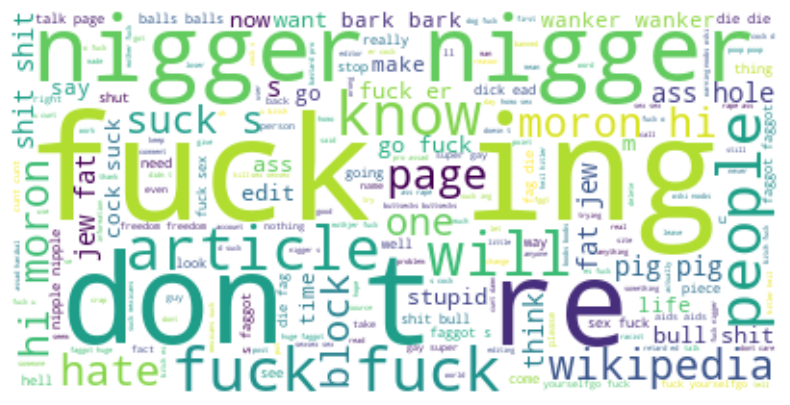

In [11]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter out toxic comments
toxic_comments = train_df[train_df['toxic'] == 1]['comment_text']

# Concatenate all toxic comments
toxic_text = " ".join(comment for comment in toxic_comments)

# Generate the word cloud
wordcloud = WordCloud(background_color="white").generate(toxic_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# This wordcloud shows words that are highly innapropriate and toxic
plt.show()


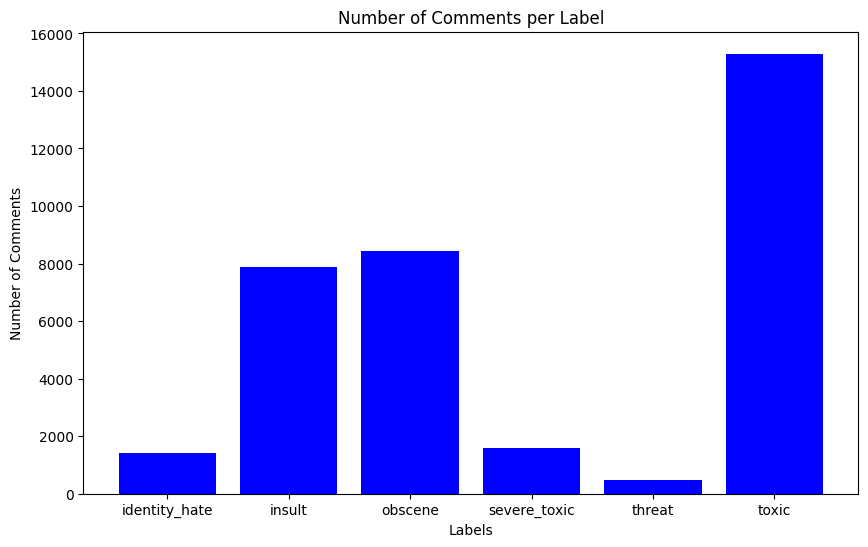

In [6]:
# Import necessary library
import matplotlib.pyplot as plt

# Calculate count of each label
label_counts = y_train.sum()

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(label_counts.index, label_counts.values, color='b')
plt.title('Number of Comments per Label')
plt.xlabel('Labels')
plt.ylabel('Number of Comments')
plt.show()

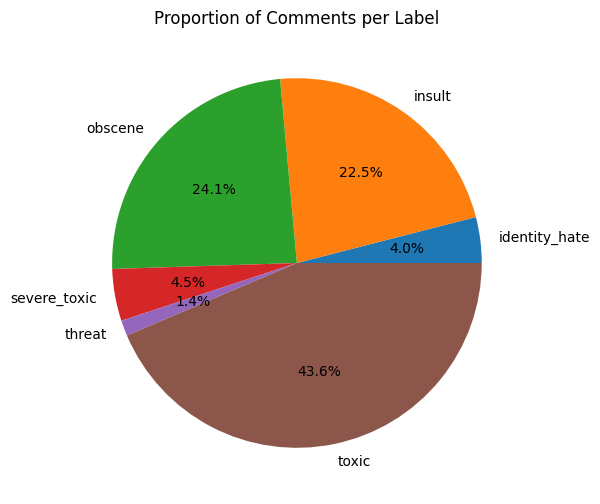

In [7]:
# Create pie chart
plt.figure(figsize=(10,6))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Comments per Label')
plt.show()

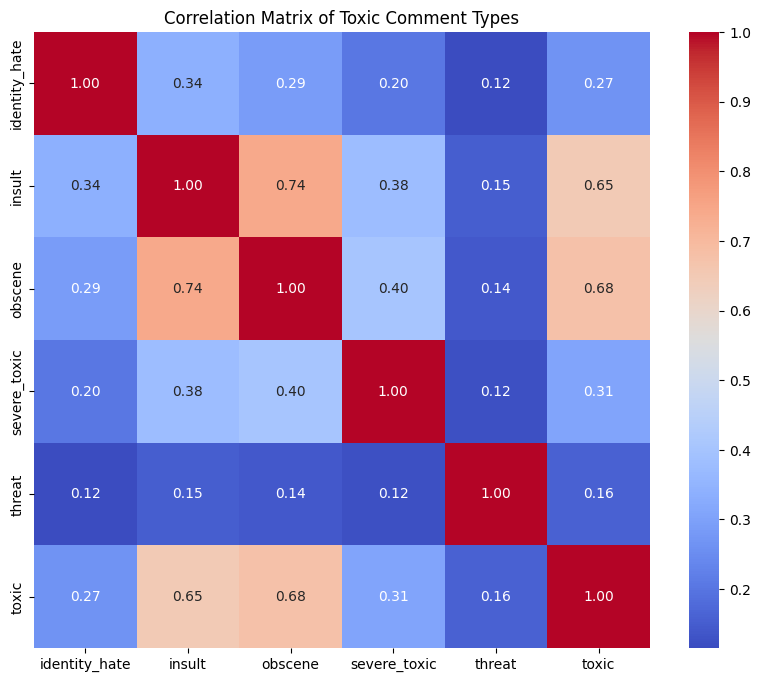

In [10]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = y_train.corr()

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Toxic Comment Types')
plt.show()
